# 🍷 Predicting Wine Quality using Gradient Boosting Classifier
### Boosting technique to improve model performance by minimizing prediction errors step-by-step


In [9]:
#📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#📌 Step 2: Load and Prepare Dataset
# Load the wine quality dataset (semicolon-separated)
df = pd.read_csv("winequality-red.csv", sep=";")

# Convert wine 'quality' into binary: good (1) if >= 7, else not good (0)

df['label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Drop original 'quality' column to avoid confusion
df = df.drop('quality', axis=1)

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [12]:
#📌 Step 3: Train-Test Split

# Separate features (X) and target label (y)
X = df.drop('label', axis=1)
y = df['label']

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
#📌 Step 4: Balance the Data using SMOTE

# Apply SMOTE to balance the dataset (especially for class 1)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Print class distribution after balancing
print("After SMOTE:", np.bincount(y_train_res))

After SMOTE: [1105 1105]


In [15]:
#📌 Step 5: Initialize and Train Gradient Boosting Classifier


# 📌 Gradient Boosting builds models sequentially, correcting previous errors

# ✅ n_estimators = number of boosting rounds (trees)

# ✅ learning_rate controls how much each tree influences the final result
# ✅ max_depth keeps trees small to prevent overfitting

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Fit the model on the balanced training data
gb_model.fit(X_train_res, y_train_res)

GradientBoostingClassifier(random_state=42)

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       277
           1       0.54      0.70      0.61        43

    accuracy                           0.88       320
   macro avg       0.74      0.80      0.77       320
weighted avg       0.89      0.88      0.88       320



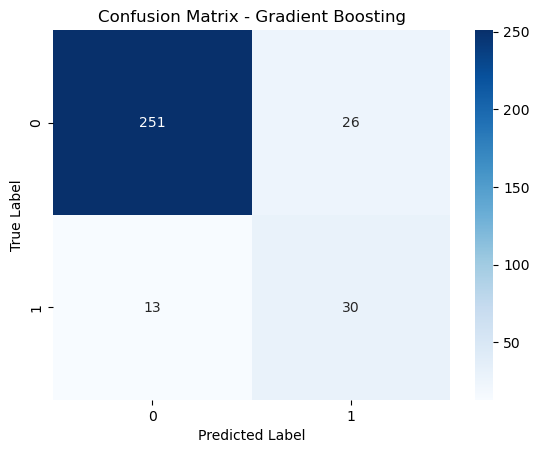

In [16]:
#📌 Step 6: Make Predictions and Evaluate

# Predict on test data
y_pred = gb_model.predict(X_test)

# Classification performance
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

C:\Users\askpr\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


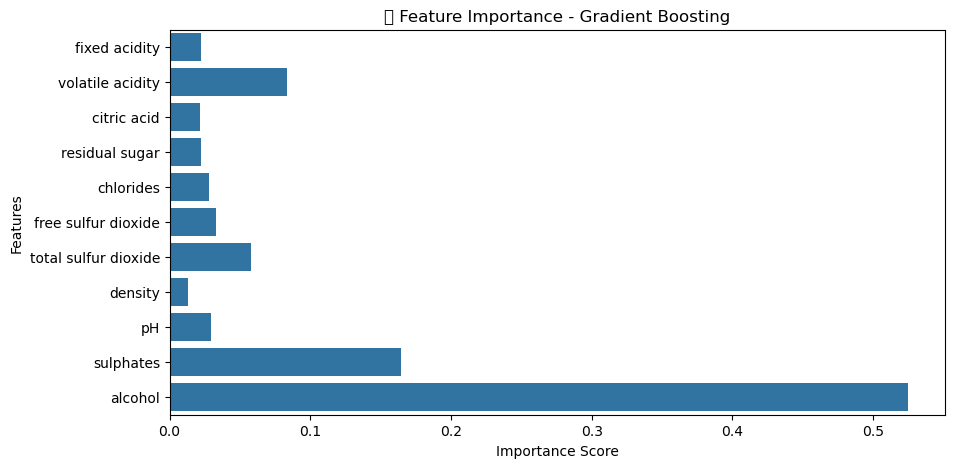

In [17]:
#📌 Step 7: Feature Importance Plot

# 📌 Show which features were most useful for prediction
importances = gb_model.feature_importances_
features = X.columns

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=features)
plt.title("🔍 Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## ✅ Summary: Gradient Boosting for Wine Quality

- Built a powerful sequential model to detect high-quality wines

- Balanced data using SMOTE to improve fairness

- Gradient Boosting improved performance by minimizing prediction errors step-by-step

- Feature importance revealed that alcohol and sulphates had strong influence

- Boosting helps when we need more accurate, robust models even from weak learners
